In [1]:
# Imports 
CWD = %pwd
CWD = str(CWD)

import json
from six.moves import cPickle
import os
import sys
import statistics

from IPython.core.display import HTML 
from IPython.core.display import Image, display, display_pretty

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pipeline


%matplotlib inline  


CWD

/Users/zhuyifan/Documents/2016 Summer Research/textmatters/coco-text
loading annotations into memory...
Done (t=16.34s)
creating index...
index created!
loading annotations into memory...
0:00:04.027880
creating index...
index created!
loading annotations into memory...
Done (t=23.16s)
creating index...
index created!


'/Users/zhuyifan/Documents/2016 Summer Research/textmatters'

In [2]:
COCO_PATH = os.path.join(CWD,'data','coco')
COCO_ANNO_PATH = os.path.join(COCO_PATH, 'annotations')
COCO_TEXT_PATH = os.path.join(CWD, 'coco-text')
sys.path.insert(0, COCO_TEXT_PATH)
import coco_text as ct
ct = pipeline.ct

In [3]:
"""
Load instances data, build dictionaries:
    1. [categories]     : mapping from category id to category information
    2. [images]         : mapping from coco image id to the information of the image
    3. [img_instances]  : mapping from coco img id to a list of instances information
    4. [instance_imgs]  : mapping from category id to a list of image id that contains the instances
"""
COCO_PATH = os.path.join(CWD, 'data', 'coco')
COCO_ANNOTATION_PATH = os.path.join(COCO_PATH, 'annotations')

coco_info = json.load(open(os.path.join(COCO_ANNOTATION_PATH, 'image_info_test2014.json')))
categories = {}
category_names = {}
for cate in coco_info['categories']:
    categories[cate['id']] = cate
    category_names[cate['name']] = cate
    

data = json.load(open(os.path.join(COCO_ANNOTATION_PATH, 'instances_train2014.json')))
img_instances = {}
instance_imgs = {}
images = {}
for note in data['annotations']:
    img_id = note['image_id']
    cate_id = note['category_id']
    
    if img_id not in img_instances:
        img_instances[img_id] = []
    img_instances[img_id].append(note)
    

    if cate_id not in instance_imgs:
        instance_imgs[cate_id] = []
    instance_imgs[cate_id].append(img_id)

for img_info in data['images']:
    images[img_info['id']] = img_info

len(images), len(categories), len(img_instances), len(instance_imgs)

(82783, 80, 82081, 80)

In [4]:
"""
Generate the images ids for anecdotal studies
"""
print "Available categories:\n%s"%[k for k,_ in category_names.iteritems()]
def gen_imgid_for_cate(name, title="Images ids for category", post_fix="img_ids", fil=(lambda img_id: img_id)):
    if name not in category_names:
        print "Category %s doesn't exist"%name
        return
    
    img_lst = instance_imgs[category_names[name]['id']]
    img_lst = [x for x in img_lst if fil(x)]
    underscore_name = name.replace(' ','_')
    pipeline.makePickle('%s_%s'%(underscore_name,post_fix), img_lst)
    print title + (" %s [%d]"%(name, len(img_lst)))

for name,_ in category_names.iteritems():    
    gen_imgid_for_cate(name)
    gen_imgid_for_cate(
        name, 
        title="Image ids with text for category ", 
        post_fix="with_text_img_ids",
        fil=(lambda x : len(ct.getAnnIds(imgIds=[x])) > 0)
    )
    gen_imgid_for_cate(
        name, 
        title="Image ids without text for category ", 
        post_fix="without_text_img_ids",
        fil=(lambda x : len(ct.getAnnIds(imgIds=[x])) == 0)
    )


Available categories:
[u'toilet', u'teddy bear', u'cup', u'bicycle', u'kite', u'carrot', u'stop sign', u'tennis racket', u'donut', u'snowboard', u'sandwich', u'motorcycle', u'oven', u'keyboard', u'scissors', u'airplane', u'couch', u'mouse', u'fire hydrant', u'boat', u'apple', u'sheep', u'horse', u'banana', u'baseball glove', u'tv', u'traffic light', u'chair', u'bowl', u'microwave', u'bench', u'book', u'elephant', u'orange', u'tie', u'clock', u'bird', u'knife', u'pizza', u'fork', u'hair drier', u'frisbee', u'umbrella', u'bottle', u'bus', u'bear', u'vase', u'toothbrush', u'spoon', u'train', u'sink', u'potted plant', u'handbag', u'cell phone', u'toaster', u'broccoli', u'refrigerator', u'laptop', u'remote', u'surfboard', u'cow', u'dining table', u'hot dog', u'car', u'sports ball', u'skateboard', u'dog', u'bed', u'cat', u'person', u'skis', u'giraffe', u'truck', u'parking meter', u'suitcase', u'cake', u'wine glass', u'baseball bat', u'backpack', u'zebra']
Images ids for category toilet [2873

In [5]:
"""
Return all the image ids that has instances
"""
img_id_set = set()
for name,_ in category_names.iteritems():    
    img_id_lst = instance_imgs[category_names[name]['id']]
    img_id_without_text =  [x for x in img_id_lst if (lambda x : len(ct.getAnnIds(imgIds=[x])) == 0)]
    img_id_set |= set(img_id_without_text)
    
img_id_lst = list(img_id_set)
print len(img_id_lst), len(images)
pipeline.makePickle('no_text_has_instance_img_ids', img_id_lst)

82081 82783


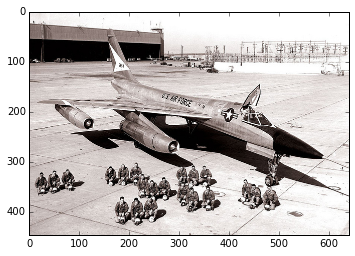

In [18]:
"""Starting anecdotal experiment!!"""
"""First verify if ablating any part of a plane will disrupt the caption."""

#get an airplane image
import random
from scipy import misc
coco = pipeline.coco
# imgids = coco.getImgIds(catIds= [category_names['airplane']['id']])
# img = coco.loadImgs(imgids[random.randint(0, len(imgids))])[0]

img = coco.loadImgs(178533)[0]
I = misc.imread(os.path.join(COCO_PATH, 'train2014', img['file_name']))
plt.imshow(I)

In [ ]:
"""ablate the hell out of it"""
x, y, w, h = 500, 300, 50, 50
Ip = I.copy()
Ip[y:y+h, x:x+w] = 0
plt.imshow(I)